# Breweries in the United States

Source: Open Brewery Database Public API

References:
* freecodecamp.com
* stackoverflow.com

Data initially scrapped in 2018.  Data is updated via Github dataset repository

In [201]:
import requests 
import pandas as pd
import numpy as np
import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Load JSON file with data extracted from Public API

In [203]:
# retrieve JSON data from the file
with open("brewery_data.json", "r") as file:
    brewery_js = json.load(file)

In [204]:
# rows and columns

df.shape

(8247, 16)

In [205]:
# Convert data from JSON to DataFrame
df = pd.DataFrame.from_dict(brewery_js, orient='columns')
df.head()

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,None,None,Norman,Oklahoma,73069-8224,United States,-97.46818222,35.25738891,4058160490,http://www.405brewing.com,Oklahoma,1716 Topeka St
1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,None,None,Austin,Texas,78745-1197,United States,None,None,5129211545,http://www.512brewing.com,Texas,407 Radam Ln Ste F200
2,34e8c68b-6146-453f-a4b9-1f6cd99a5ada,1 of Us Brewing Company,micro,8100 Washington Ave,None,None,Mount Pleasant,Wisconsin,53406-3920,United States,-87.88336350209435,42.72010826899558,2624847553,https://www.1ofusbrewing.com,Wisconsin,8100 Washington Ave
3,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,None,None,San Diego,California,92101-6618,United States,-117.129593,32.714813,6195782311,http://10barrel.com,California,1501 E St
4,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,97701-9847,United States,-121.281706,44.08683531,5415851007,http://www.10barrel.com,Oregon,62970 18th St


In [206]:
# information on columns and non-null count

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8247 entries, 0 to 8246
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              8247 non-null   object
 1   name            8247 non-null   object
 2   brewery_type    8247 non-null   object
 3   address_1       7479 non-null   object
 4   address_2       94 non-null     object
 5   address_3       26 non-null     object
 6   city            8247 non-null   object
 7   state_province  8247 non-null   object
 8   postal_code     8247 non-null   object
 9   country         8247 non-null   object
 10  longitude       5920 non-null   object
 11  latitude        5920 non-null   object
 12  phone           7407 non-null   object
 13  website_url     7068 non-null   object
 14  state           8247 non-null   object
 15  street          7479 non-null   object
dtypes: object(16)
memory usage: 1.0+ MB


In [207]:
# unique values 

df.nunique()

id                8247
name              8102
brewery_type        11
address_1         7378
address_2           92
address_3           25
city              3101
state_province     116
postal_code       7992
country             12
longitude         5801
latitude          5801
phone             7213
website_url       6715
state              116
street            7378
dtype: int64

## Data Preparation

In [209]:
# What are the figures for unique value for breweries in the United States

df[df['country'] == 'United States'].nunique()

id                7970
name              7825
brewery_type        11
address_1         7111
address_2            4
address_3            0
city              2917
state_province      54
postal_code       7725
country              1
longitude         5535
latitude          5535
phone             6988
website_url       6485
state               54
street            7111
dtype: int64

In [210]:
# Create a dataframe for US breweries

df_us = df[df['country'] == 'United States'].copy()
df_us.head()

,id,name,brewery_type,address_1,address_2,address_3,city,state_province,postal_code,country,longitude,latitude,phone,website_url,state,street
0,5128df48-79fc-4f0f-8b52-d06be54d0cec,(405) Brewing Co,micro,1716 Topeka St,None,None,Norman,Oklahoma,73069-8224,United States,-97.46818222,35.25738891,4058160490,http://www.405brewing.com,Oklahoma,1716 Topeka St
1,9c5a66c8-cc13-416f-a5d9-0a769c87d318,(512) Brewing Co,micro,407 Radam Ln Ste F200,None,None,Austin,Texas,78745-1197,United States,None,None,5129211545,http://www.512brewing.com,Texas,407 Radam Ln Ste F200
2,34e8c68b-6146-453f-a4b9-1f6cd99a5ada,1 of Us Brewing Company,micro,8100 Washington Ave,None,None,Mount Pleasant,Wisconsin,53406-3920,United States,-87.88336350209435,42.72010826899558,2624847553,https://www.1ofusbrewing.com,Wisconsin,8100 Washington Ave
3,ef970757-fe42-416f-931d-722451f1f59c,10 Barrel Brewing Co,large,1501 E St,None,None,San Diego,California,92101-6618,United States,-117.129593,32.714813,6195782311,http://10barrel.com,California,1501 E St
4,6d14b220-8926-4521-8d19-b98a2d6ec3db,10 Barrel Brewing Co,large,62970 18th St,None,None,Bend,Oregon,97701-9847,United States,-121.281706,44.08683531,5415851007,http://www.10barrel.com,Oregon,62970 18th St


In [211]:
# Dimensions for the US dataframe
df_us.shape

(7970, 16)

In [212]:
# information on columns and non-null count
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7970 entries, 0 to 8188
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7970 non-null   object
 1   name            7970 non-null   object
 2   brewery_type    7970 non-null   object
 3   address_1       7202 non-null   object
 4   address_2       4 non-null      object
 5   address_3       0 non-null      object
 6   city            7970 non-null   object
 7   state_province  7970 non-null   object
 8   postal_code     7970 non-null   object
 9   country         7970 non-null   object
 10  longitude       5645 non-null   object
 11  latitude        5645 non-null   object
 12  phone           7180 non-null   object
 13  website_url     6838 non-null   object
 14  state           7970 non-null   object
 15  street          7202 non-null   object
dtypes: object(16)
memory usage: 1.0+ MB


In [213]:
# Drop Address_3 column since there are no non-null values

df_us.drop(['address_3'], axis=1, inplace=True)
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7970 entries, 0 to 8188
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7970 non-null   object
 1   name            7970 non-null   object
 2   brewery_type    7970 non-null   object
 3   address_1       7202 non-null   object
 4   address_2       4 non-null      object
 5   city            7970 non-null   object
 6   state_province  7970 non-null   object
 7   postal_code     7970 non-null   object
 8   country         7970 non-null   object
 9   longitude       5645 non-null   object
 10  latitude        5645 non-null   object
 11  phone           7180 non-null   object
 12  website_url     6838 non-null   object
 13  state           7970 non-null   object
 14  street          7202 non-null   object
dtypes: object(15)
memory usage: 996.2+ KB


In [214]:
# Unique values for each column
df_us.nunique()

id                7970
name              7825
brewery_type        11
address_1         7111
address_2            4
city              2917
state_province      54
postal_code       7725
country              1
longitude         5535
latitude          5535
phone             6988
website_url       6485
state               54
street            7111
dtype: int64

In [215]:
# There are more unique values for states than there are states
# Look at unique values for state 
df_us.groupby(['state_province'])['id'].nunique()

state_province
 Utah                     1
Alabama                  45
Alaska                   51
Arizona                 124
Arkansas                 45
California              912
Colorado                431
Connecticut              94
Delaware                 28
District of Columbia     16
Florida                 312
Georgia                 100
Hawaii                   23
Idaho                    67
Illinois                254
Indiana                 162
Iowa                     91
Kansas                   47
Kentucky                 58
Louisiana                43
MIssouri                  1
Maine                   114
Maryland                109
Massachusetts           163
Michigan                375
Minnesota               182
Mississippi              16
Missouri                141
Montana                  92
Nebraska                 57
Nevada                   51
New Hampshire            76
New Jersey              115
New Mexico               83
New York                418
North

Several states have misspelled names which is causing the unique values for states to be 54 instead of 50.  Also, District of Columbia is included therefore the correct value should be 51.

In [217]:
# convert state and state_province from object to string

df_us['state'] = df_us['state'].astype('string')
df_us['state_province'] = df_us['state_province'].astype('string')
df_us.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7970 entries, 0 to 8188
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7970 non-null   object
 1   name            7970 non-null   object
 2   brewery_type    7970 non-null   object
 3   address_1       7202 non-null   object
 4   address_2       4 non-null      object
 5   city            7970 non-null   object
 6   state_province  7970 non-null   string
 7   postal_code     7970 non-null   object
 8   country         7970 non-null   object
 9   longitude       5645 non-null   object
 10  latitude        5645 non-null   object
 11  phone           7180 non-null   object
 12  website_url     6838 non-null   object
 13  state           7970 non-null   string
 14  street          7202 non-null   object
dtypes: object(13), string(2)
memory usage: 996.2+ KB


In [218]:
# State_province. Replace misspelled state names

df_us['state_province'] = df_us['state_province'].replace(" Utah","Utah")
df_us['state_province'] = df_us['state_province'].replace("MIssouri","Missouri")
df_us['state_province'] = df_us['state_province'].replace("Washington ","Washington")



In [219]:
# State.  Replace misspelled state names

df_us['state'] = df_us['state'].replace(" Utah","Utah")
df_us['state'] = df_us['state'].replace("MIssouri","Missouri")
df_us['state'] = df_us['state'].replace("Washington ","Washington")

In [220]:
# Confirm update
df_us.nunique()

id                7970
name              7825
brewery_type        11
address_1         7111
address_2            4
city              2917
state_province      51
postal_code       7725
country              1
longitude         5535
latitude          5535
phone             6988
website_url       6485
state               51
street            7111
dtype: int64

In [221]:
# Look at state and state_province
df_us.groupby(['state_province', 'state'])['id'].nunique()

state_province        state               
Alabama               Alabama                  45
Alaska                Alaska                   51
Arizona               Arizona                 124
Arkansas              Arkansas                 45
California            California              912
Colorado              Colorado                431
Connecticut           Connecticut              94
Delaware              Delaware                 28
District of Columbia  District of Columbia     16
Florida               Florida                 312
Georgia               Georgia                 100
Hawaii                Hawaii                   23
Idaho                 Idaho                    67
Illinois              Illinois                254
Indiana               Indiana                 162
Iowa                  Iowa                     91
Kansas                Kansas                   47
Kentucky              Kentucky                 58
Louisiana             Louisiana                43
Maine  

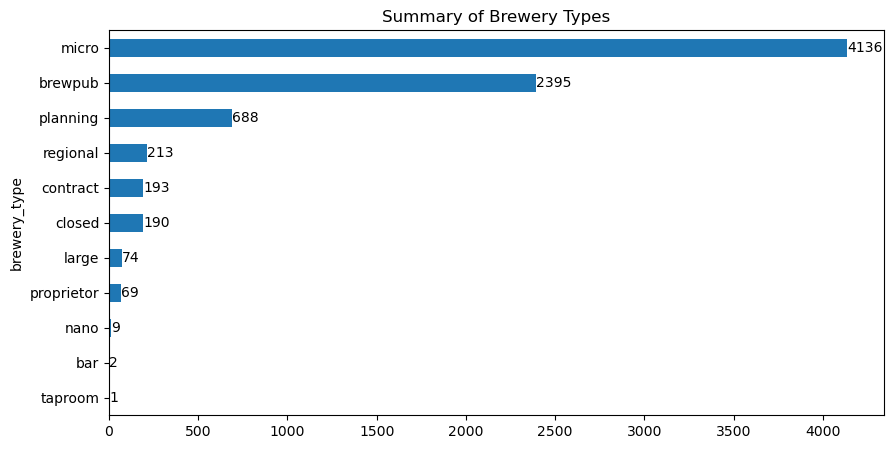

In [222]:
# Brewery Types

ax = df_us.brewery_type.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10,5), title="Summary of Brewery Types")
ax.bar_label(ax.containers[0])
plt.show()

In [223]:
# Closed:  A location which has been closed
# Planning: A brewery in planning not yet opened to the public
# Bar:  A bar. O brewery equipment on premise
# Taproom:  A place with a brewery serves beer

# Remove brewery_types that do not represent an open brewery
# Drops  881 rows.

df_us = df_us[~df_us['brewery_type'].isin(['closed','planning','bar','taproom'])]


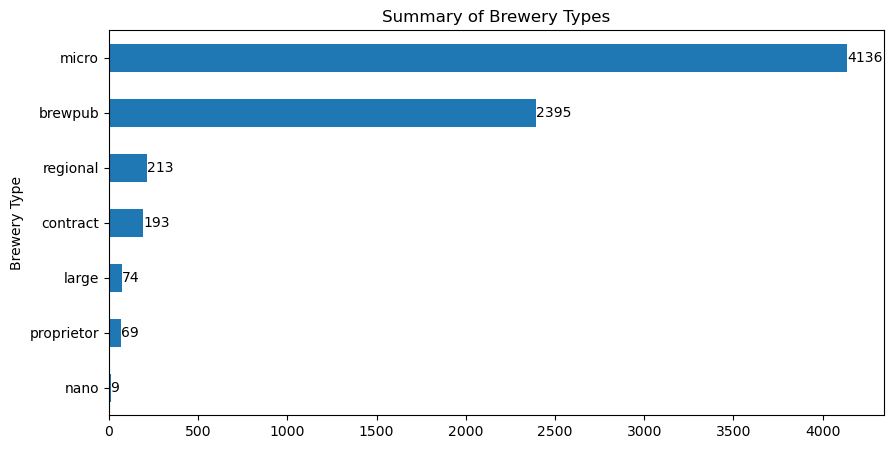

In [224]:
# Brewery types after update
ax = df_us.brewery_type.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10,5), title="Summary of Brewery Types")
ax.bar_label(ax.containers[0])
ax.set_ylabel('Brewery Type')
plt.show()

## Exploratory Data Analysis

In [226]:
# Total Breweries in the US

df_us['id'].value_counts().sum()

7089

In [227]:
# Fields with  missing values
df_us.isnull().sum()

id                   0
name                 0
brewery_type         0
address_1           78
address_2         7085
city                 0
state_province       0
postal_code          0
country              0
longitude         1701
latitude          1701
phone              544
website_url        781
state                0
street              78
dtype: int64

In [228]:
# Percentage of breweries that have website url information

(df_us['website_url'].value_counts().sum())/(df_us['id'].value_counts().sum())

0.8898293130201721

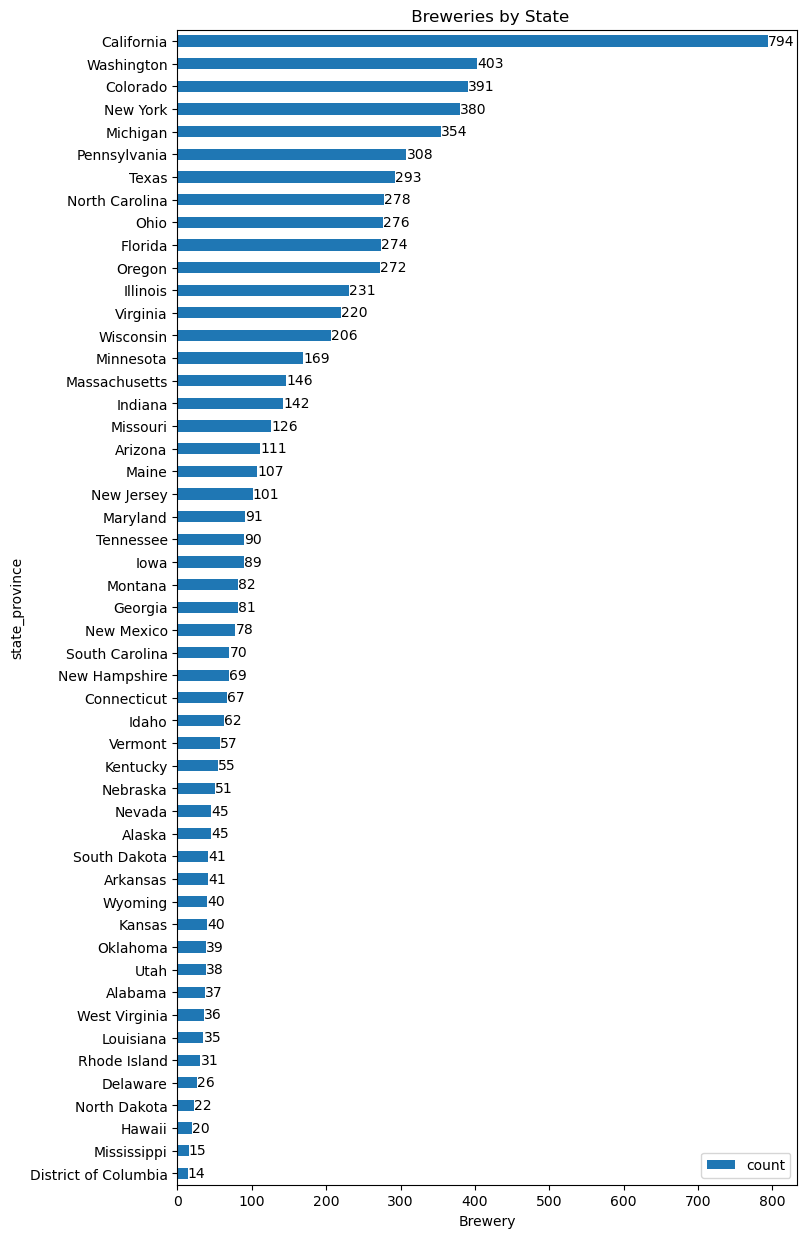

In [229]:
# Breweries by State

ax=df_us.groupby('state_province')['brewery_type']\
         .agg(['count'])\
         .sort_values('count',ascending=True) \
         .plot(kind='barh', figsize=(8,15), title = ' Breweries by State')
ax.set_xlabel('Brewery')
ax.bar_label(ax.containers[0])
plt.show() 



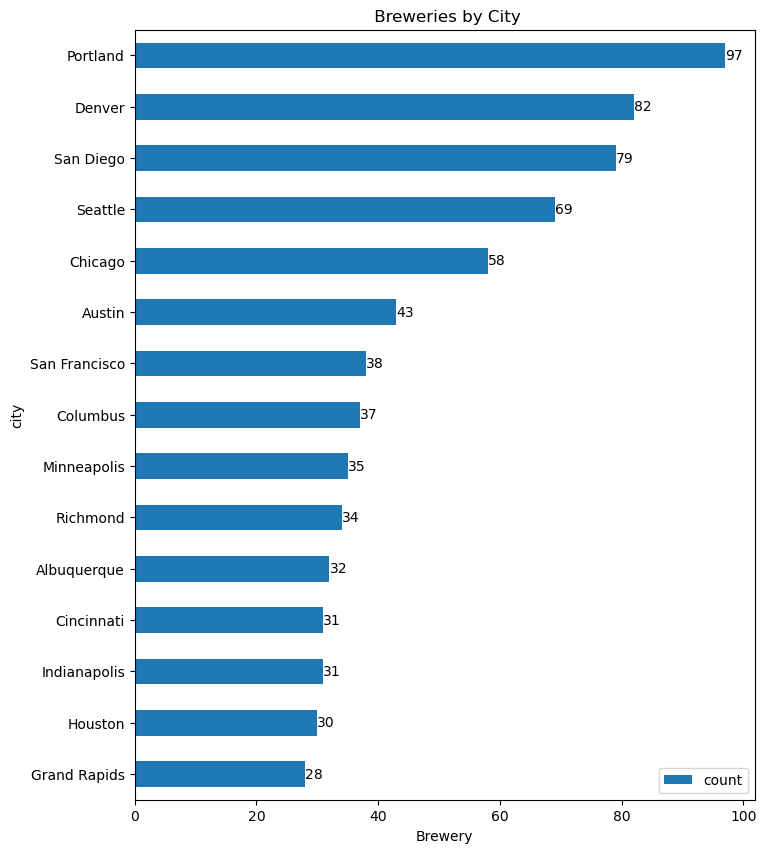

In [230]:
# Breweries by City (Top 20 by number of breweries)

ax=df_us.groupby('city')['brewery_type']\
         .agg(['count'])\
         .sort_values('count',ascending=True) \
         .tail(15) \
         .plot(kind='barh', figsize=(8,10), title = ' Breweries by City')
ax.set_xlabel('Brewery')
ax.bar_label(ax.containers[0])
plt.show() 


In [231]:
# Average length of Brewery name

df_us['name'].astype(str).map(len).mean()

22.881506559458316

In [232]:
# Most common brewery names

brewname = df_us.groupby(df_us['name'].str.slice(0,23))['id'].agg(['count']).sort_values('count', ascending=False)
brewname.head(5)

,count
name,
Granite City Food & Bre,32
Gordon Biersch Brewery,21
Iron Hill Brewery & Res,14
RAM Restaurant and Brew,12
Karl Strauss Brewing Co,11


In [233]:
# Average length of website url

df_us['website_url'].astype(str).map(len).mean()

26.89547185780787

In [234]:
# Breweries associated with a website url

web = df_us.groupby(['website_url'])['id'].agg(['count']).sort_values('count', ascending=False)
web.head()

,count
website_url,
http://www.gcfb.net,23
http://www.rockbottom.com,21
http://www.craftworksrestaurants.com,19
http://www.mcmenamins.com,17
http://www.ironhillbrewery.com,14


In [235]:
# 10 postal codes with the most breweries

brewpostal = df_us.groupby(df_us['postal_code'].str.slice(0,5))['id'].agg(['count']).sort_values('count', ascending=False)
brewpostal.head(10)

,count
postal_code,
80301,15
28801,15
44113,15
98107,14
97214,14
92121,13
98402,12
29405,12
80205,12


Zipcode 80301 belongs to Boulder Colorado. Zipcode 28801 belongs to Asheville, NC.  Zipcode 44113 belongs to Cleveland, OH

## Create a CSV file

In [238]:
# Write cleaned df_us to csv
df_us.to_csv('US_Breweries.csv', index=False)